In [1]:
import pandas as pd 
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
user_history = pd.read_csv("user_history.csv")
user_history

,USER ID,alpine kimono,sweden kansas,student icon,supreme ivan,albert charlie,heavy trapeze,fabric tokyo,brother robin,tiger catalog,...,cigar lagoon,equal comedy,bombay podium,helena robot,prodigy rhino,jumbo gray,radius wizard,fame quiz,bazaar complex,glass slogan
0,100950,2.192897,0.361397,0.531663,0.016105,0.694338,1.250662,1.483259,1.799682,0.664616,...,0.309236,2.622033,1.242243,2.947560,0.693319,0.625303,2.352295,1.548417,1.517709,1.508219
1,100956,2.776597,0.788821,1.187149,0.473049,2.245112,1.998881,0.072812,1.441970,2.264368,...,2.304845,1.498307,0.319484,0.089212,3.157167,2.789594,1.003377,1.141516,2.011509,0.377898
2,100962,0.281717,5.046727,4.407484,2.138591,1.075562,0.385842,0.626482,0.026648,1.949374,...,1.463952,0.601814,1.983130,2.364877,0.429133,2.758070,0.563619,0.271453,0.579626,1.785609
3,100969,0.943147,1.165713,2.016138,1.236626,0.973435,2.514205,0.022476,1.091282,1.320748,...,1.428416,3.791742,1.102070,3.250911,1.209403,0.246261,0.558631,1.163652,1.922758,1.008040
4,100974,0.485729,4.633607,4.120416,1.497073,1.463875,0.867737,0.877514,0.019603,1.751483,...,1.179954,1.031741,1.935182,2.012611,0.553173,2.614605,0.313479,0.143246,0.914407,2.011048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,125614,0.200730,3.819307,3.793920,1.352770,1.616516,0.138227,0.193954,0.770098,1.724992,...,0.985254,0.508837,2.033624,2.783638,0.360851,1.787872,0.749357,0.205445,0.945106,1.155107
4496,125622,1.139876,0.361305,1.420300,1.024918,2.313955,1.638803,1.570336,0.233047,1.521743,...,3.606324,1.670899,1.127929,1.888831,4.198021,2.934536,0.501603,0.923039,0.737211,0.675006
4497,125629,2.423679,0.555591,1.244828,0.100391,1.098254,2.027846,1.485342,0.912006,0.304603,...,0.050602,2.439248,1.352124,2.926793,0.254287,0.488679,2.181696,1.367859,1.410247,0.549376
4498,125636,0.096291,3.028528,2.554836,0.404308,1.401119,0.760813,0.356988,1.873021,1.977173,...,0.609813,0.242120,1.061562,2.616126,0.091176,1.162114,1.218459,1.067140,0.441260,0.666655


In [3]:
test_rating = pd.read_csv("Data_Division/test_rating.csv")
test_rating

,USER ID,PRODUCT,RATING
0,100950,imagine disco,8
1,100962,house vodka,7
2,100969,violet saga,0
3,100969,spend oberon,8
4,100974,barcode arnold,5
...,...,...,...
6740,117447,update lola,1
6741,117447,stop tropic,3
6742,117447,meter sigma,5
6743,117447,saint desert,8


In [4]:
train_rating = pd.read_csv("Data_Division/train_rating.csv")
train_rating

,USER ID,PRODUCT,RATING
0,110982,lobster diana,3
1,104305,diploma moment,4
2,108924,viva avalon,6
3,104494,conan antenna,7
4,108850,pepper chicago,4
...,...,...,...
26975,116457,bazooka diagram,3
26976,104336,meter sigma,0
26977,106107,inch fragile,5
26978,114970,bazooka diagram,1


In [5]:
#Doing PCA (in order to do PCA we must strip the first column then transpose our matrix)
X = user_history.loc[:, user_history.columns != 'USER ID'].to_numpy()
X_meanzero = (X - np.mean(X, axis = 0)) # subtract the mean 
X = (X_meanzero / np.std(X, axis = 0)) # divide by the standard deviation
U,S,Vt = np.linalg.svd(X, full_matrices=True)

#Reduce the dimensionality of the data to 2 dimensions to visualize it 
user_data_t2 = pd.DataFrame(data = U[:,0:2], index = user_history['USER ID'])
user_data_t2

,0,1
USER ID,,
100950,-0.004514,0.020640
100956,-0.013275,-0.014971
100962,0.023204,-0.004410
100969,-0.001742,0.012079
100974,0.020923,-0.005239
...,...,...
125614,0.022736,-0.003458
125622,-0.014478,-0.017387
125629,-0.006893,0.022093


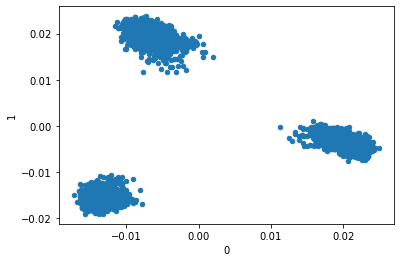

In [6]:
#Visualize the data in 2D
ax1 = user_data_t2.plot.scatter(x=0, y=1)

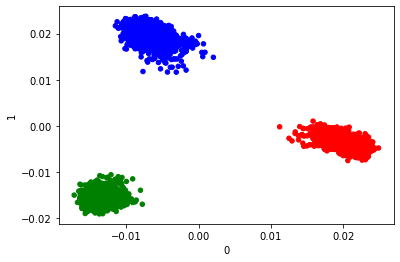

In [7]:
#Use k-means to separate the data into 3 clusters
km = KMeans(n_clusters = 3)
km.fit(X)
prediction = km.predict(X)
prediction.shape
clusters_df = pd.DataFrame(data = prediction, index = user_history['USER ID'])
colors = {0:'red', 1:'green', 2:'blue'}
ax1 = user_data_t2.plot.scatter(x=0, y=1, c=clusters_df[0].map(colors))

In [8]:
user_history_indexed = user_history.set_index('USER ID')
clusters_df = clusters_df.rename(columns={0: 'Cluster'})

In [9]:
# separate the user_history df into clusters
user_history_clustered = pd.concat([user_history_indexed, clusters_df], axis=1)

cluster0 = user_history_clustered[user_history_clustered['Cluster']==0]
cluster1 = user_history_clustered[user_history_clustered['Cluster']==1]
cluster2 = user_history_clustered[user_history_clustered['Cluster']==2]

all_clusters = [cluster0, cluster1, cluster2]

In [10]:
num_dimensions_for_each_cluster = []
cutoff = 0.9

#find the optimal number of dimensions (min that keeps at least 90% of the variation) for each cluster separately
for cluster in all_clusters:
    X = cluster.loc[:, cluster.columns != 'Cluster'].to_numpy()
    X_meanzero = (X - np.mean(X, axis = 0)) # subtract the mean 
    X = (X_meanzero / np.std(X, axis = 0)) # divide by the standard deviation
    U,S,Vt = np.linalg.svd(X, full_matrices=True)
    fractions = np.zeros((100))
    fractions_greater_than_cutoff = np.zeros((100))
    for num_components in range(1,Vt.shape[0]+1):
        # Compute the fraction of the total spectrum in the first n singular values
        fractions[num_components-1] = sum(S[0:num_components]**2) / sum(S**2)
        fractions_greater_than_cutoff[num_components-1] = sum(S[0:num_components]**2) / sum(S**2)
    fractions_greater_than_cutoff[fractions_greater_than_cutoff<cutoff]=1
    num_dimensions_for_each_cluster.append(np.argmin(fractions_greater_than_cutoff))

#do PCA on each cluster with its optimal number of dimensions
reduced_cluster_data = []
for i in range(len(all_clusters)):
    X = all_clusters[i].loc[:, all_clusters[i].columns != 'Cluster'].to_numpy()
    X_meanzero = (X - np.mean(X, axis = 0)) # subtract the mean 
    X = (X_meanzero / np.std(X, axis = 0)) # divide by the standard deviation
    U,S,Vt = np.linalg.svd(X, full_matrices=True)
    reduced_cluster_data.append(pd.DataFrame(data = U[:,0:num_dimensions_for_each_cluster[i]], 
                                index=all_clusters[i].reset_index(inplace=False)['USER ID']))
reduced_features = pd.concat(reduced_cluster_data)

In [11]:
user_ratings_table = pd.pivot_table(train_rating,values='RATING', index='USER ID',
                    columns='PRODUCT')

In [14]:
matrix_with_added_features = pd.merge(user_ratings_table,reduced_features,how='inner',left_index=True, right_index=True)
matrix_with_added_features

,adrian crater,anagram mentor,apropos pizza,bandit anatomy,banjo ladder,barcode arnold,bazooka diagram,bronze mystic,calypso zigzag,casino unit,...,41,42,43,44,45,46,47,48,49,50
USER ID,,,,,,,,,,,,,,,,,,,,,
100950,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,5.0,NaN,...,-0.044542,0.011709,0.015376,0.009845,-0.004951,0.003312,-0.002641,-0.048845,-0.013083,-0.041910
100956,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,0.000725,0.058342,-0.004037,0.018830,0.041845,-0.000675,0.009724,0.005006,-0.008859,-0.034484
100962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027264,-0.013981,0.027541,-0.007461,-0.032249,-0.034212,-0.063857,0.016469,-0.006328,0.013543
100969,NaN,10.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,0.007532,-0.033075,0.002421,0.006739,-0.030793,-0.011330,-0.001852,0.066974,0.022154,-0.038921
100974,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1.0,NaN,NaN,...,-0.023888,0.000063,-0.034337,-0.004065,-0.033979,-0.024047,-0.008123,-0.026590,0.039052,0.038255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117440,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,-0.009867,0.049956,0.033794,-0.033068,0.008365,-0.014516,-0.012384,0.010095,0.015102,0.017658
117442,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,0.004309,-0.002286,-0.008670,0.031515,0.011737,0.004234,0.060564,0.009758,0.022113,0.011008
117446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.058283,0.031087,0.008413,0.009527,0.042324,0.028396,0.068055,0.031478,-0.015458,0.040834


In [32]:
def compute_MSE(P,Q):
    U = matrix_with_added_features.shape[0]
    M = 75
    data = matrix_with_added_features.to_numpy()
    total_squared_error = 0
    count_total = 0
    for u in range(U):
        for m in range(M):
            if not np.isnan(data[u][m]):
                actual = data[u][m]
                pred = np.dot(P[u,:], Q[:,m])
                total_squared_error += (actual-pred)**2
                count_total += 1.0
    return total_squared_error/count_total

In [38]:
#complete the matrix using gradient descent (from HW6)
K = 10
U = matrix_with_added_features.shape[0]
M = matrix_with_added_features.shape[1]
P = np.random.rand(U,K) #each row represents p_u for user u
Q = np.random.rand(K,M) #each column represents q_m for movie m

data = matrix_with_added_features.to_numpy()

data

# train
num_iter = 10
learning_rate = 0.001

for i in range(num_iter):
    dLdP = np.zeros((U,K))
    dLdQ = np.zeros((K,M))
    for u in range(U):
        for m in range(M):
            if not np.isnan(data[u][m]):
                dLdP[u,:] += 2*(data[u][m] - np.dot(P[u,:],Q[:,m]))*np.transpose(Q[:,m])
                dLdQ[:,m] += 2*(data[u][m] - np.dot(P[u,:],Q[:,m]))*np.transpose(P[u,:])
    P += learning_rate * dLdP
    Q += learning_rate * dLdQ
#     print(P)
#     print(Q)
    print(i)
    print(compute_MSE(P,Q))

0
7.921797719963062
1
96496.22507399778
2
1.991249760480804e+19
3
8.149139721279859e+65
4
2.5403164589746405e+209
5
inf
6
inf


<ipython-input-38-106887b034af>:24: RuntimeWarning: invalid value encountered in add
  P += learning_rate * dLdP
<ipython-input-38-106887b034af>:25: RuntimeWarning: invalid value encountered in add
  Q += learning_rate * dLdQ


7
nan
8
nan
9
nan
